# Data Cookbook

This "data cookbook" will contain 4 recipes that will explain how to do 4 important calculations or functions in pandas. 

In [17]:
#Reminder importing for necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Requests lets us grab info from a web page
import requests
# BeautifulSoup parses and searches that info
from bs4 import BeautifulSoup
import seaborn as sns

## Recipe 1: Scraping a website using beautiful soup

Scraping a website using beautiful soup requires the requests and BeatifulSoup packages. 

In [3]:
# Create a variable called URL
url = "https://athletics.whitman.edu/sports/mens-soccer/stats/2023"

# Use requests.get to grab the html
my_html = requests.get(url)

#Turn the html into soup using BeautifulSoup
soup = BeautifulSoup(my_html.text, 'html')

Once the website is turned into beautiful soup, you can use tags to search for specific features/text in the website. For example, here I am scraping the Whitman Athletics page for the 2023 Men's soccer statistics. 

For Recipes 2 and 3, I will be using a data frame I created in a previous project of the statistics for the Whitworth, Pacific Lutheran, and Whitman men's soccer team in 2023. 

In [8]:
df_stats = pd.read_csv('NWC_Stats')
df_stats.head(10)

,Unnamed: 0,Player,Number,Points,Minutes,Position,School,Efficiency
0,0,"McAllister, Lucas",2,17,1112,M/F,WC,0.015288
1,1,"Gomez, Christian",8,16,1119,M,WC,0.014298
2,2,"Romero, Edwin",9,16,1216,F,WC,0.013158
3,3,"Valero, Sawyer",7,14,1068,F,WC,0.013109
4,4,"Burrill, Jacob",11,12,909,F,WC,0.013201
5,5,"Gonzalez, Jr., Pablo",4,8,1579,D,WC,0.005066
6,6,"Stonier, Zachary",19,7,882,F,WC,0.007937
7,7,"Perez-Cuellar, Erick",26,6,1258,M,WC,0.004769
8,8,"Kobayashi, Riki",20,5,580,M/F,WC,0.008621
9,9,"Taylor, Noa",12,5,261,F,WC,0.019157


## Recipe 2: Finding Unique Values in a Dataframe

To find the unique values in a column, you can use the .unique() function from pandas. This returns all the unique row values from the column. The .value_counts() function returns the number of each unique row value. This can also be a very useful function. Below is the code to do so. 

In [9]:
#Chooses the "Position" column and finds unique values
df_stats["Position"].unique()

array(['M/F', 'M', 'F', 'D', 'D/M', 'GK'], dtype=object)

In [13]:
#Chooses the "Position" column and finds the number of instances of each unique value
df_stats["Position"].value_counts()

M      19
F      15
D      15
M/F     6
GK      3
D/M     1
Name: Position, dtype: int64

## Recipe 3: Creating a visualization using seaborn

Visualizations are a very important tool to use in data analysis. Seaborn is one of the packages that can be used to create them. Seaborn is especially good because it contains many different plot types and allows for a lot of customization of the plots. Below I will demonstrate how to plot a strip plot using Seaborn. *note This requires the seaborn package. Use .install() to install seaborn if you have not already

Text(0.5, 1.0, 'Efficiency by Position')

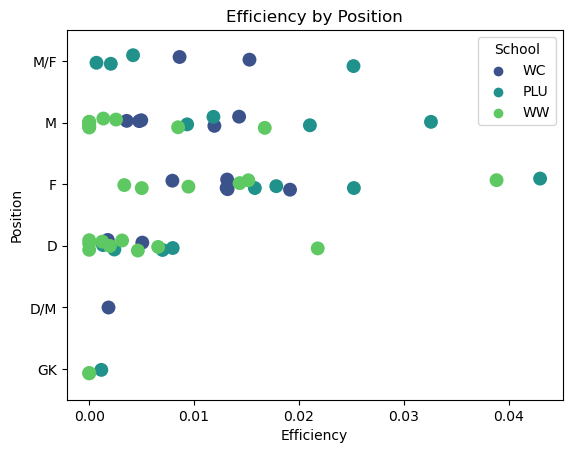

In [18]:
#We choose to do a stripplot with x value Efficiency and y value position, colored by school
sns.stripplot(x='Efficiency', y='Position', data=df_stats, size=10, hue = "School", palette='viridis', orient='h')
#Creating labels using pyplot
plt.xlabel('Efficiency')
plt.ylabel('Position')
plt.title('Efficiency by Position')

## Recipe 4: Merging dataframes

To merge dataframes, use the function 'pd.merge()'. The first input is the first data frame to be merged, the second input is the other data frame to be merged, the third input is the column that will be used to merge on, and the last input is what type of merge you're doing. In this example, I inner join merged two data frames on the column "Number". This means that the merge only merges rows with the same "Number" value in both data frames. Note  that the column names must be the same in both data frames in order to merge on a column. 

In [4]:
#Creating df_1 and df_2 using dictionaries
column_names_1 = {"Number":[1,2,3,4,5,6,7,8], "Letter": ['a','b','c','d','e','f','g','h']}
column_names_2 = {"Number":[1,2,3,4,5,6], "Symbol": ['!','@','#','$','%','^']}
df_1 = pd.DataFrame(column_names_1)
df_2 = pd.DataFrame(column_names_2)

In [5]:
#Implementing an inner join merge on the 'Number' column
df = pd.merge(df_1, df_2, on = 'Number', how = 'inner')

In [6]:
df

,Column_Name,Letter,Symbol
0,1,a,!
1,2,b,@
2,3,c,#
3,4,d,$
4,5,e,%
5,6,f,^
